In [57]:
import pandas as pd
from utils.exploratory_data_utils import *
import seaborn as sns
import matplotlib.pyplot as plt

# Importando dados e explorando

## Entendendo os dados e o nosso objetivo:

Nosso objetivo é um modelo de previsão para preços, variáveis categóricas como nomes e ids não vão impactar diretamente na nossa análise, pois não se trata de avaliar o nome do estabelecimento em si, mas sim, o local naqual ele está e se esse local tem influência no preço do estabelecimento por ser um bairro nobre ou não.

In [58]:
data = pd.read_csv('../src/data/bronze/teste_indicium_precificacao.csv')

In [59]:
data.head(3)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

* Temos 6 dados categóricos:
  * ultima_review
  * room_type
  * bairro
  * bairro_group
  * host_name
  * nome

In [61]:
data.isna().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

### Retirar colunas nome, id, host_id, host_name e ultima_review

In [62]:
df = data.copy()
df = remove_columns(df, ['id','nome', 'host_name', 'ultima_review'])
df.head(3)

,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
1,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
2,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194


### Analisando coluna com nulos nos reviews_por_mes

In [63]:
# Ou seja, os valores nulos de reviews_por_mes são devido a não haver reviews, logo, vamos preencher com 0
df[(df['reviews_por_mes'].isna()) & (df['numero_de_reviews'] > 0)]
df['reviews_por_mes'] = df['reviews_por_mes'].fillna(0)

In [64]:
df.dropna(how='any',inplace=True)
df.isna().sum()

host_id                          0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

In [65]:
# Não temos dados duplicados
df.duplicated().sum()

np.int64(0)

## Vamos visualizar a correlação das variáveis

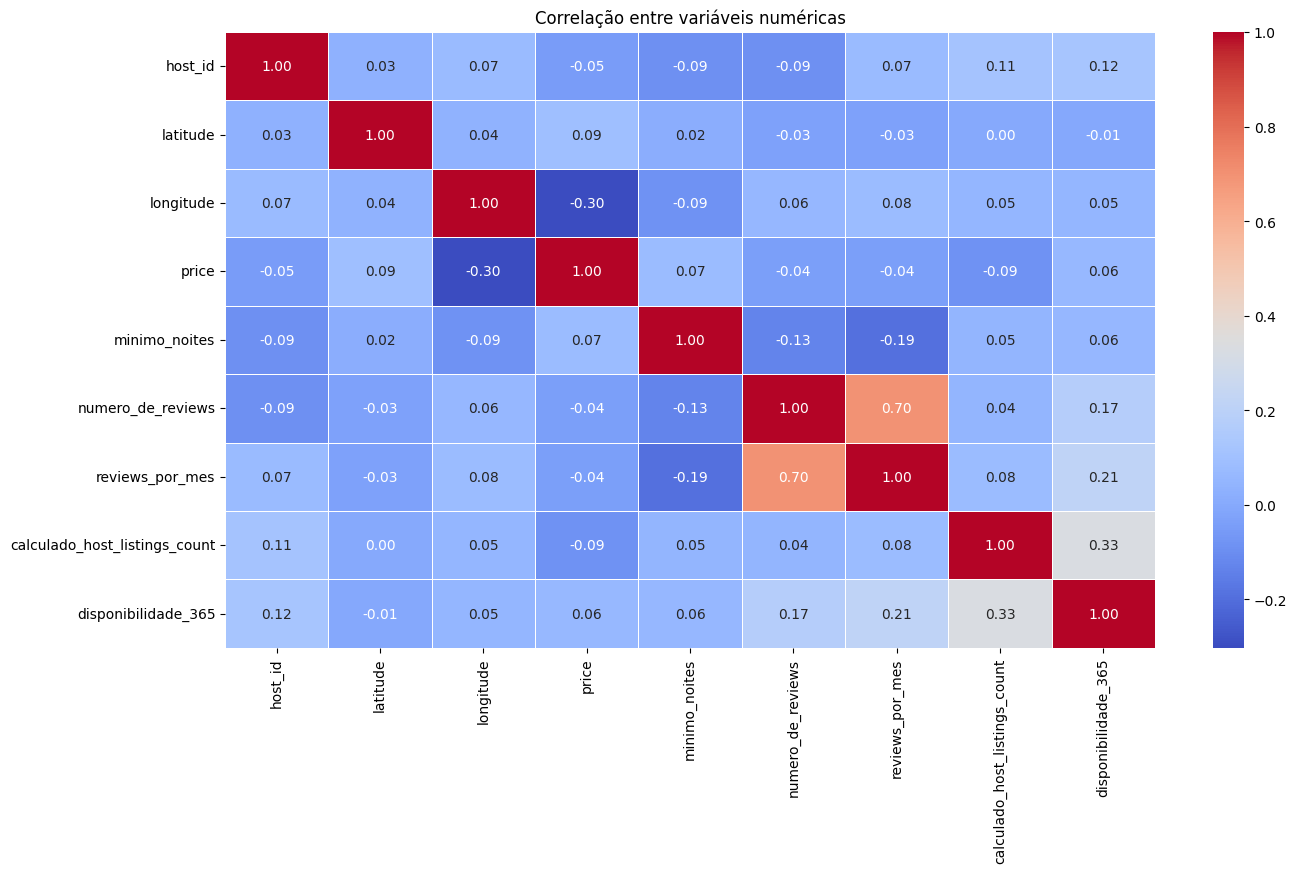

In [66]:
df_numeric = df.select_dtypes(include=['number'])

corr = df_numeric.corr(method='kendall')

plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlação entre variáveis numéricas")
plt.show()

### Vamos visualizar a coluna categórica de bairro group

In [67]:
df['bairro_group'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

C:\Users\Akyla\AppData\Local\Temp\ipykernel_14004\87083067.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df['bairro_group'], palette='viridis')


Text(0.5, 0.98, 'Distribuição dos bairros')

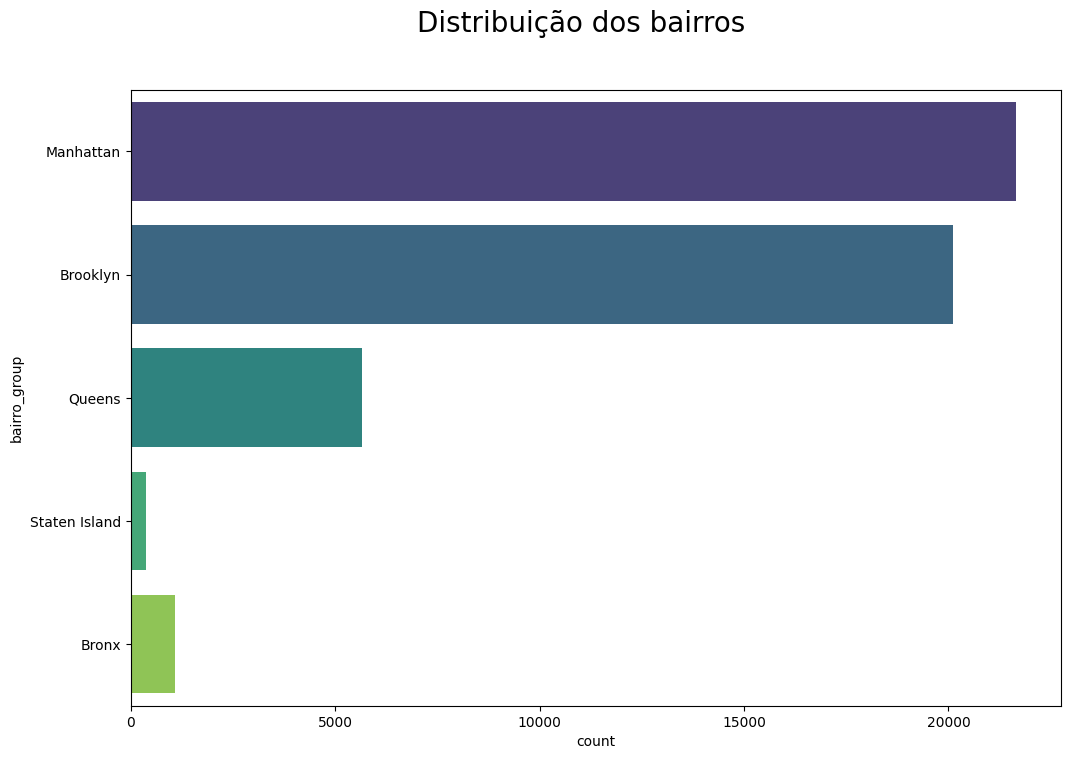

In [68]:
sns.countplot(data=df['bairro_group'], palette='viridis')
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.suptitle('Distribuição dos bairros', fontsize=20)

### Tipos de quarto

C:\Users\Akyla\AppData\Local\Temp\ipykernel_14004\4236785252.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df['room_type'], palette='viridis')


Text(0.5, 0.98, 'Distribuição dos tipos de quarto')

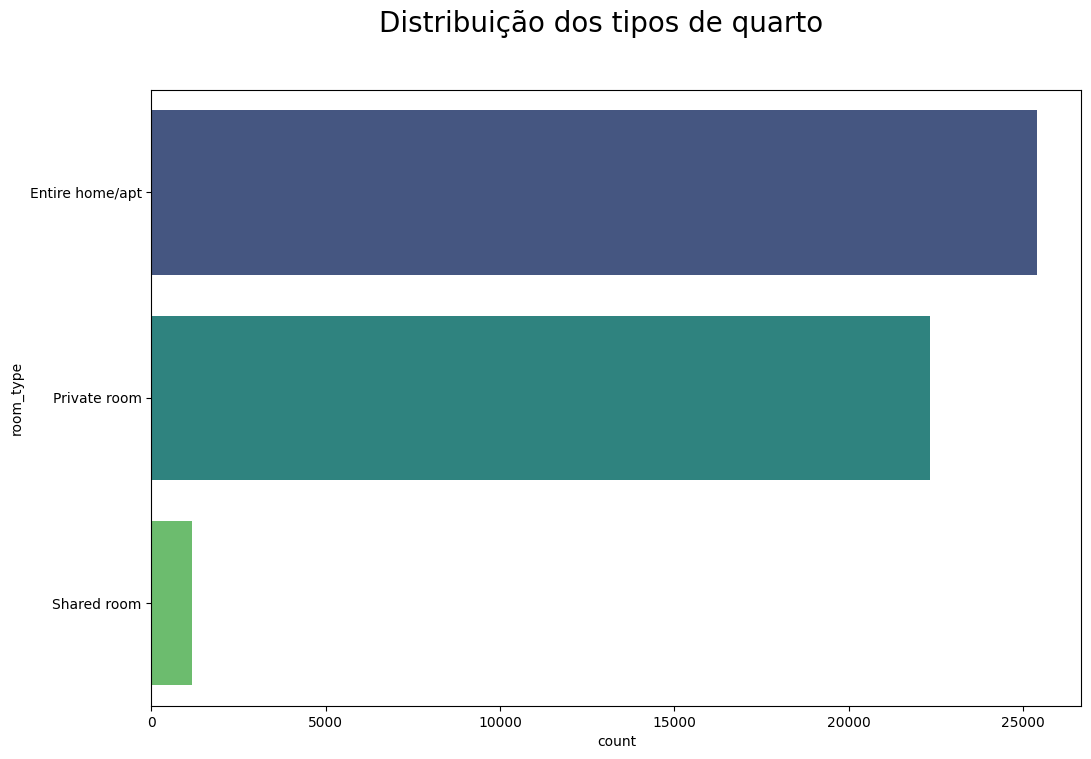

In [69]:
sns.countplot(data=df['room_type'], palette='viridis')
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.suptitle('Distribuição dos tipos de quarto', fontsize=20)

### Agora vamos visualizar a organização dos dados quanto aos preços e número de reviews

Text(0.5, 1.0, 'Preço x Número de reviews')

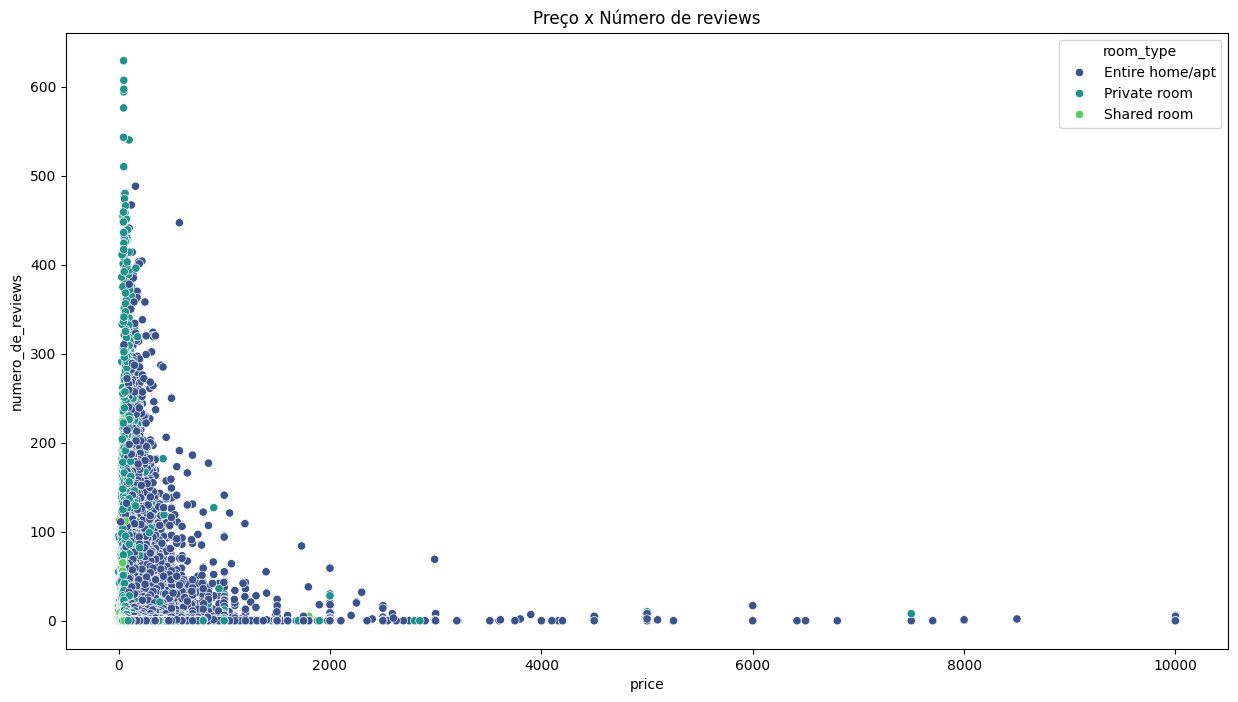

In [70]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x='price', y='numero_de_reviews', hue='room_type', palette='viridis')
plt.title('Preço x Número de reviews')

### Agora vamos visualizar a organização dos dados quanto a latitude e longitude


Text(0.5, 1.0, 'Distribuição geográfica dos imóveis')

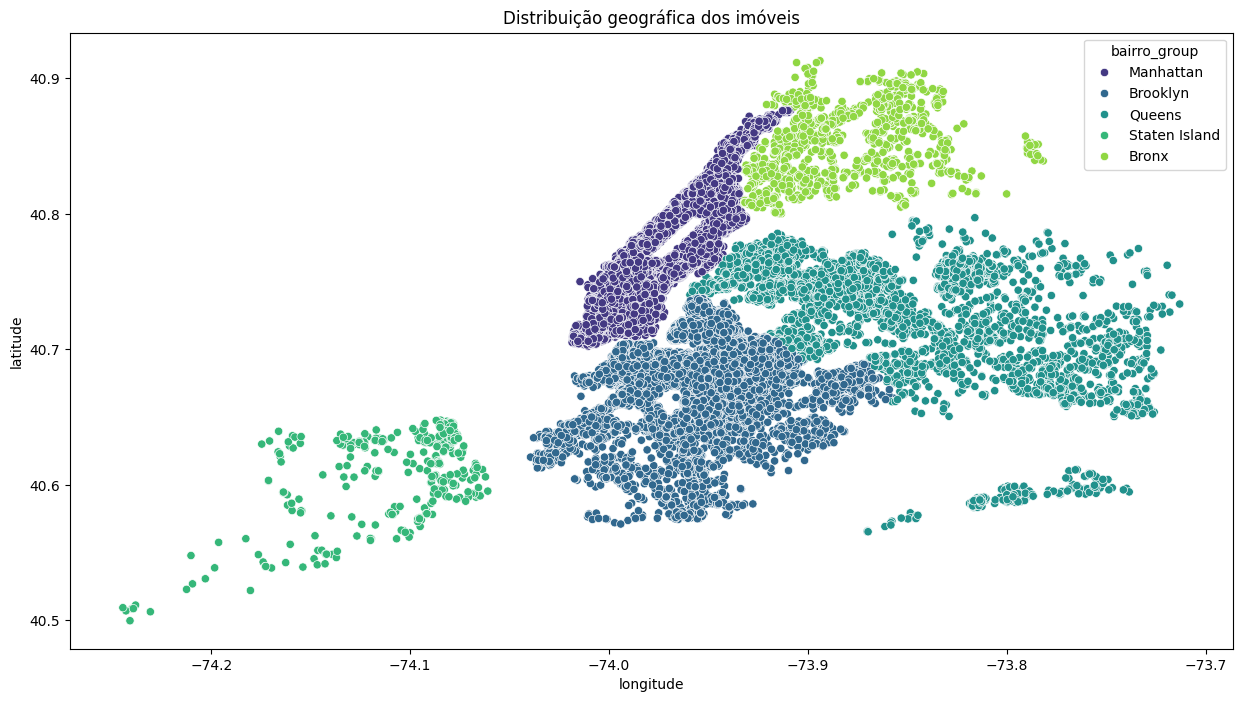

In [71]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['bairro_group'], palette='viridis')
plt.title('Distribuição geográfica dos imóveis')

In [72]:
# Salvar dataset para futuras análises
df.to_csv('../src/data/silver/teste_indicium_precificacao.csv', index=False)


### Temos mais de 200 bairros, uma possibilidade é agrupar os bairros e colocar uma média de preço para cada bairro

In [73]:
df['bairro'].value_counts()


bairro
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [74]:
nomes_bairros = df['bairro'].value_counts().index
nomes_bairros = pd.DataFrame(nomes_bairros)
nomes_bairros

,bairro
0,Williamsburg
1,Bedford-Stuyvesant
2,Harlem
3,Bushwick
4,Upper West Side
...,...
216,Richmondtown
217,Fort Wadsworth
218,New Dorp
219,Rossville


In [75]:
df[df["bairro"] == 'Harlem']["price"].mean()

np.float64(118.97404063205417)

In [76]:
df = get_bairro_mean_price(df, nomes_bairros['bairro'].to_list()) 

Text(0.5, 1.0, 'Distribuição geográfica dos imóveis')

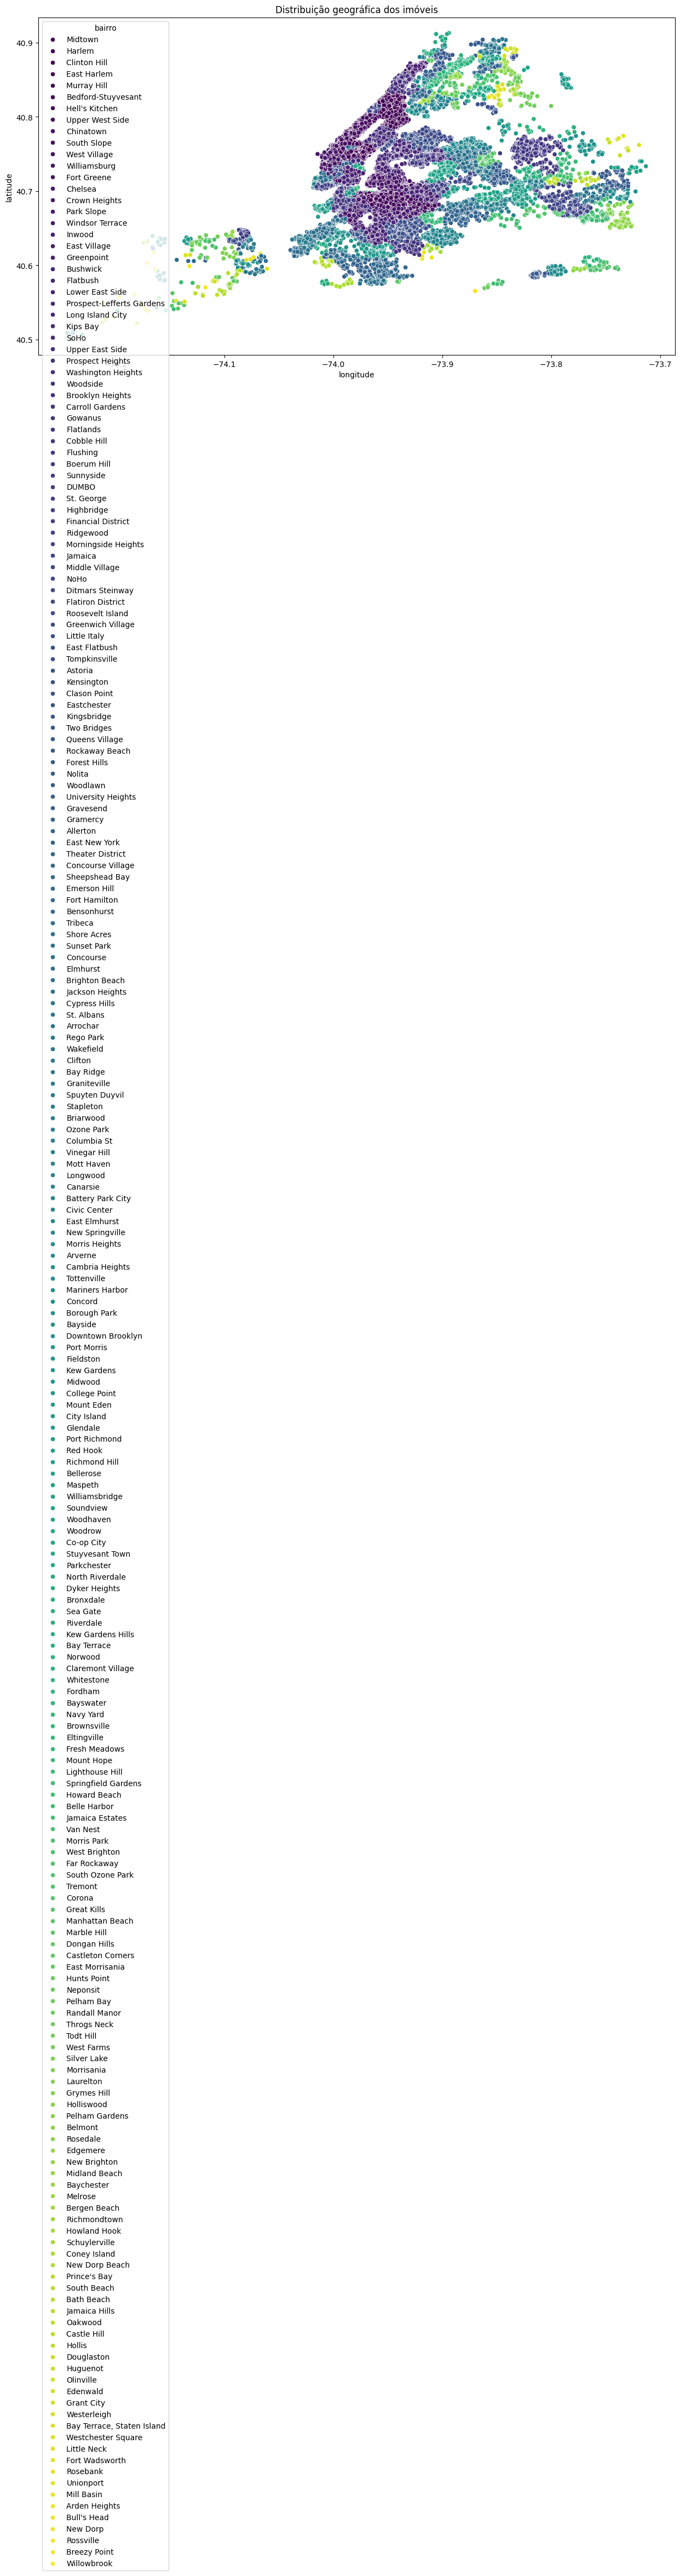

In [77]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['bairro'], palette='viridis')
plt.title('Distribuição geográfica dos imóveis')

### Distribuição dos tipos de quarto

Text(0.5, 1.0, 'Distribuição geográfica dos imóveis')

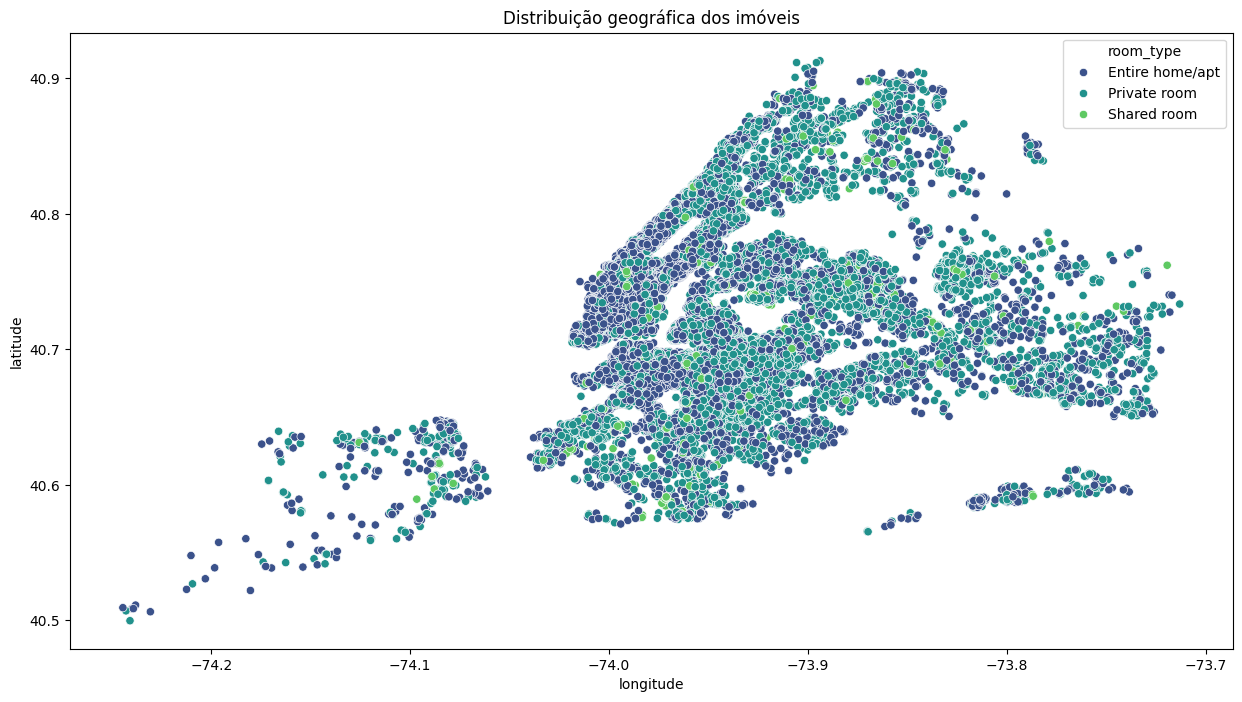

In [78]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['room_type'], palette='viridis')
plt.title('Distribuição geográfica dos imóveis')

In [79]:
# Vamos dropar a coluna bairro
df = remove_columns(df, ['bairro'])

In [80]:
df.to_csv('../src/data/silver/teste_indicium_precificacao.csv', index=False)

## Aqui iremos analisar a correlação de variáveis.

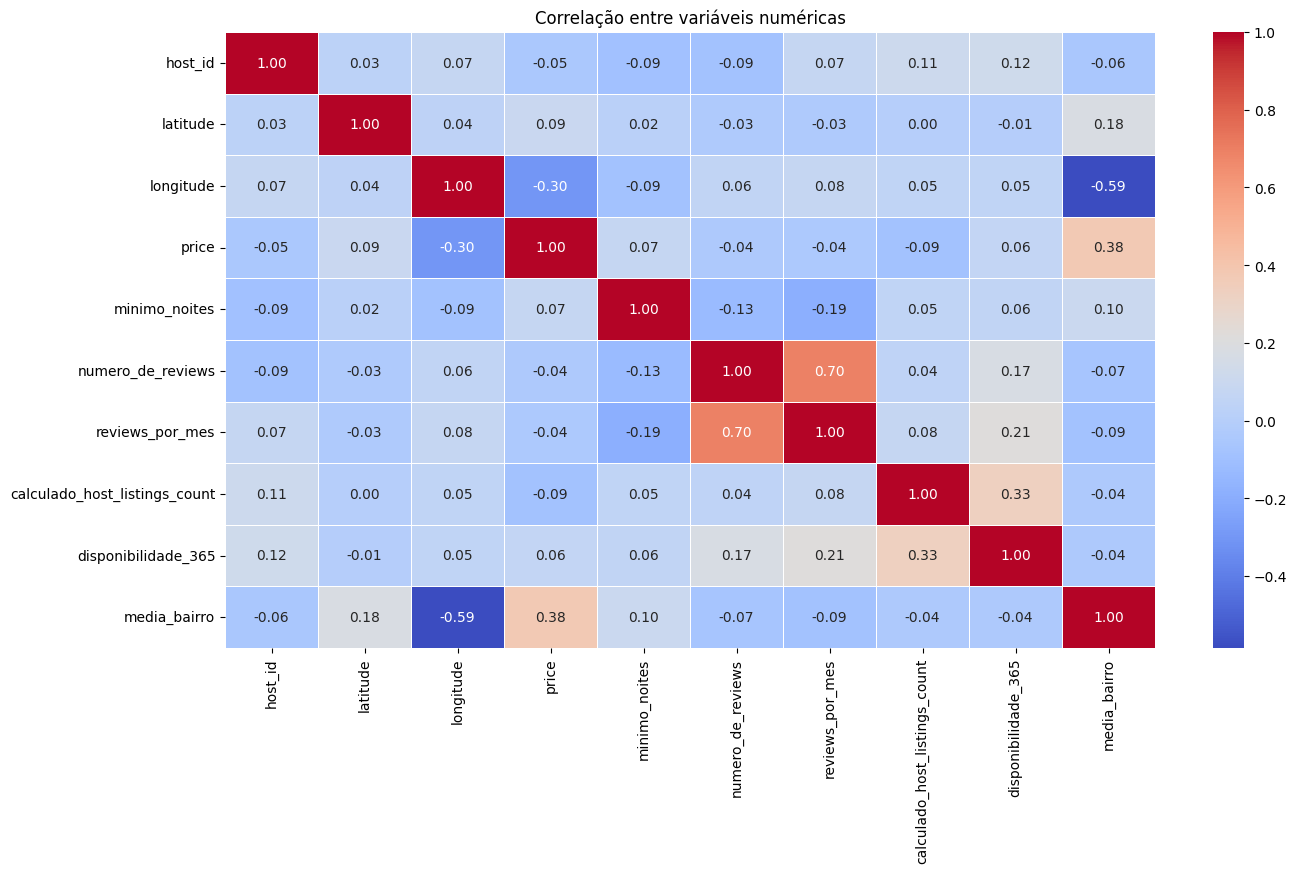

In [81]:
df = pd.read_csv('../src/data/silver/teste_indicium_precificacao.csv')

df_numeric = df.select_dtypes(include=['number'])

corr = df_numeric.corr(method='kendall')

plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlação entre variáveis numéricas")
plt.show()

Muitas das variáveis tem correlação próximo de 0, o que indica baixa influência no preço do local.

- Vamos analisar mais posteriormente uma regressão somente com colunas latitude,longitude e media_bairro

### Para a coluna bairro_group podemos aplicar one-hot-encoding para evitar dados categóricos

In [82]:
df_dummies = df_dummies = pd.get_dummies(df['bairro_group'], prefix='bairro_group_')
df_dummies

,bairro_group__Bronx,bairro_group__Brooklyn,bairro_group__Manhattan,bairro_group__Queens,bairro_group__Staten Island
0,False,False,True,False,False
1,False,False,True,False,False
2,False,True,False,False,False
3,False,False,True,False,False
4,False,False,True,False,False
...,...,...,...,...,...
48889,False,True,False,False,False
48890,False,True,False,False,False
48891,False,False,True,False,False
48892,False,False,True,False,False


In [83]:
df = pd.concat([df, df_dummies], axis=1)
df = remove_columns(df, ['bairro_group'])
df.head(3)

,host_id,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,media_bairro,bairro_group__Bronx,bairro_group__Brooklyn,bairro_group__Manhattan,bairro_group__Queens,bairro_group__Staten Island
0,2845,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,282.719094,False,False,True,False,False
1,4632,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,118.974041,False,False,True,False,False
2,4869,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,181.893357,False,True,False,False,False


### Agora vamos analisar a coluna room_type e tentar classificar em respostas padronizadas ou aplicar OHE.

In [84]:
# Temos 3 possíveis valores para a coluna room_type
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

#### Como temos apenas 3 possíveis valores, vamos utilizar one-hot-encoding

In [85]:
df_dummies = pd.get_dummies(df['room_type'], prefix='room_type_')
df_dummies

,room_type__Entire home/apt,room_type__Private room,room_type__Shared room
0,True,False,False
1,False,True,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
48889,False,True,False
48890,False,True,False
48891,True,False,False
48892,False,False,True


In [86]:
df = pd.concat([df, df_dummies], axis=1)
df = remove_columns(df, ['room_type'])
df.head(3)

,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,media_bairro,bairro_group__Bronx,bairro_group__Brooklyn,bairro_group__Manhattan,bairro_group__Queens,bairro_group__Staten Island,room_type__Entire home/apt,room_type__Private room,room_type__Shared room
0,2845,40.75362,-73.98377,225,1,45,0.38,2,355,282.719094,False,False,True,False,False,True,False,False
1,4632,40.80902,-73.94190,150,3,0,0.00,1,365,118.974041,False,False,True,False,False,False,True,False
2,4869,40.68514,-73.95976,89,1,270,4.64,1,194,181.893357,False,True,False,False,False,True,False,False


## Assim deixamos um csv já pronto para modelagem e testar a eficiência

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   host_id                        48894 non-null  int64  
 1   latitude                       48894 non-null  float64
 2   longitude                      48894 non-null  float64
 3   price                          48894 non-null  int64  
 4   minimo_noites                  48894 non-null  int64  
 5   numero_de_reviews              48894 non-null  int64  
 6   reviews_por_mes                48894 non-null  float64
 7   calculado_host_listings_count  48894 non-null  int64  
 8   disponibilidade_365            48894 non-null  int64  
 9   media_bairro                   48894 non-null  float64
 10  bairro_group__Bronx            48894 non-null  bool   
 11  bairro_group__Brooklyn         48894 non-null  bool   
 12  bairro_group__Manhattan        48894 non-null 

In [88]:
columns_to_convert = [
    'bairro_group__Bronx', 'bairro_group__Brooklyn', 'bairro_group__Manhattan', 
    'bairro_group__Queens', 'bairro_group__Staten Island', 'room_type__Entire home/apt', 
    'room_type__Private room', 'room_type__Shared room'
]
df = convert_boolean_columns_to_int(df, columns_to_convert)
df.to_csv('../src/data/gold/teste_indicium_precificacao_OHE.csv', index=False)

# Engenharia de features

Algumas features podem ser mescladas para dar um resultado mais abrangente, por exemplo:
* a coluna price, é o preço por noite, porém existe um número mínimo de dias que precisam ser reservados, minimo_noite, logo o valor da hospedagem deve ser a price * minimo_noite

In [89]:
df['minimo_noites'].describe()

count    48894.000000
mean         7.030085
std         20.510741
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimo_noites, dtype: float64

Utilizando describe descobrimos alguns possíveis outliers.

<Axes: ylabel='minimo_noites'>

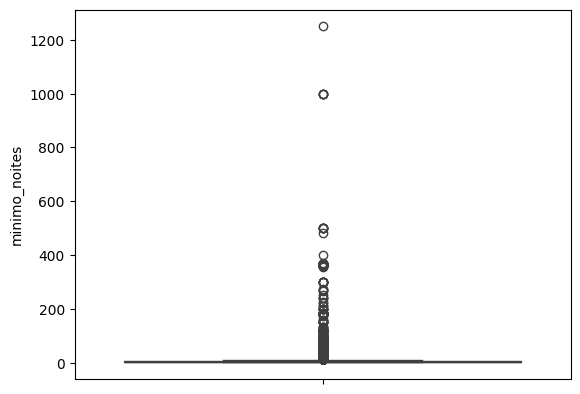

In [90]:
sns.boxplot(df['minimo_noites'])